In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install ultralytics
!pip install albumentations==1.4
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
# 1. Install roboflow
!pip install roboflow

# 2. Import Roboflow dan mount Google Drive
from roboflow import Roboflow
from google.colab import drive
import shutil
import os

# 3. Mount Google Drive
drive.mount('/content/drive')

# 4. Inisialisasi Roboflow
rf = Roboflow(api_key="sjY1k7Bc5AwCbbatoIz2")
project = rf.workspace("lebeling-sendiri-300").project("-25m-3class")
version = project.version(1)

# 5. Download dataset (format YOLOv11)
dataset = version.download("yolov11")

# 6. Salin ke Google Drive dengan nama folder khusus
custom_folder_name = "dataset"  # <- Ganti nama ini sesuai keinginanmu
destination_path = f"/content/drive/MyDrive/{custom_folder_name}/"

# Pastikan folder tujuan ada
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Salin isi dataset ke folder tujuan
shutil.copytree(dataset.location, destination_path, dirs_exist_ok=True)

print("Dataset berhasil disalin ke Google Drive dengan nama folder:", custom_folder_name)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to @25M(3class)-1 in yolov11:: 100%|██████████| 1828/1828 [00:00<00:00, 3936.40it/s]


Dataset berhasil disalin ke Google Drive dengan nama folder: dataset


In [4]:
!yolo task=detect mode=train model=yolo11l.pt data=/content/drive/MyDrive/dataset/data.yaml epochs=50

100% 49.0M/49.0M [00:01<00:00, 50.1MB/s]
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10

In [6]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/dataset/data.yaml

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,281,625 parameters, 0 gradients, 86.6 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 46.7±29.4 MB/s, size: 121.6 KB)
val: Scanning /content/drive/MyDrive/dataset/valid/labels.cache... 39 images, 5 backgrounds, 0 corrupt: 100% 39/39 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.03s/it]
                   all         39        531      0.281      0.399      0.249       0.11
        avicennia tree          5         12      0.139       0.25     0.0507     0.0159
                  nypa         18        148       0.35      0.399      0.305      0.115
       rhizophora tree         34        371      0.353      0.547       0.39        0.2
Speed: 7.1ms preprocess, 36.0ms inference, 0.0ms loss, 13.8ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at http

In [7]:
!yolo task=detect mode=predict model=//content/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/dataset/valid/images save=True

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,281,625 parameters, 0 gradients, 86.6 GFLOPs

image 1/39 /content/drive/MyDrive/dataset/valid/images/id_101_png.rf.2509103d3e51da076a31916a5881b80e.jpg: 640x640 27 rhizophora trees, 47.6ms
image 2/39 /content/drive/MyDrive/dataset/valid/images/id_133_png.rf.3c28069af09feee6387148d9056749ba.jpg: 640x640 19 rhizophora trees, 40.6ms
image 3/39 /content/drive/MyDrive/dataset/valid/images/id_155_png.rf.254f2806112ff9bd9e214231e2ceec0a.jpg: 640x640 (no detections), 40.6ms
image 4/39 /content/drive/MyDrive/dataset/valid/images/id_158_png.rf.ae44a1b0b4334380e069370a6fa10f1b.jpg: 640x640 6 nypas, 4 rhizophora trees, 40.5ms
image 5/39 /content/drive/MyDrive/dataset/valid/images/id_169_png.rf.aad09fdee23d19d61b0de620853ff770.jpg: 640x640 3 avicennia trees, 1 nypa, 16 rhizophora trees, 37.5ms
image 6/39 /content/drive/MyDrive/dataset/valid/images/id_199_png.rf.33f7b22d97be5feb

In [8]:
image_path = '/content/drive/MyDrive/dataset/valid/images/id_500_png.rf.896d679ae2b1c94bd5eb36470516ada3.jpg'
model = YOLO(f'/content/runs/detect/train/weights/best.pt')
results = model.predict(source=image_path, conf=0.25)


image 1/1 /content/drive/MyDrive/dataset/valid/images/id_500_png.rf.896d679ae2b1c94bd5eb36470516ada3.jpg: 640x640 1 avicennia tree, 6 nypas, 3 rhizophora trees, 47.5ms
Speed: 3.8ms preprocess, 47.5ms inference, 158.0ms postprocess per image at shape (1, 3, 640, 640)



image 1/1 /content/drive/MyDrive/dataset/valid/images/id_500_png.rf.896d679ae2b1c94bd5eb36470516ada3.jpg: 640x640 1 avicennia tree, 6 nypas, 3 rhizophora trees, 99.0ms
Speed: 13.3ms preprocess, 99.0ms inference, 15.5ms postprocess per image at shape (1, 3, 640, 640)

============================== HASIL DETEKSI ==============================

Kelas: nypa
Jumlah objek: 6
Total biomassa: 7.40 kg
Total karbon: 3.48 kg
Total CO₂ setara: 12.76 kg
Rata-rata confidence: 0.41

+---------+-------------+--------------+-----------------+---------------+------------+--------------+
|   Objek |   Luas (m²) |   Luas (px²) |   Biomassa (kg) |   Karbon (kg) |   CO₂ (kg) |   Confidence |
+=========+=============+==============+=================+===============+============+==============+
|       1 |        8.62 |        11522 |            1.5  |          0.7  |       2.59 |         0.53 |
+---------+-------------+--------------+-----------------+---------------+------------+--------------+
|       2 

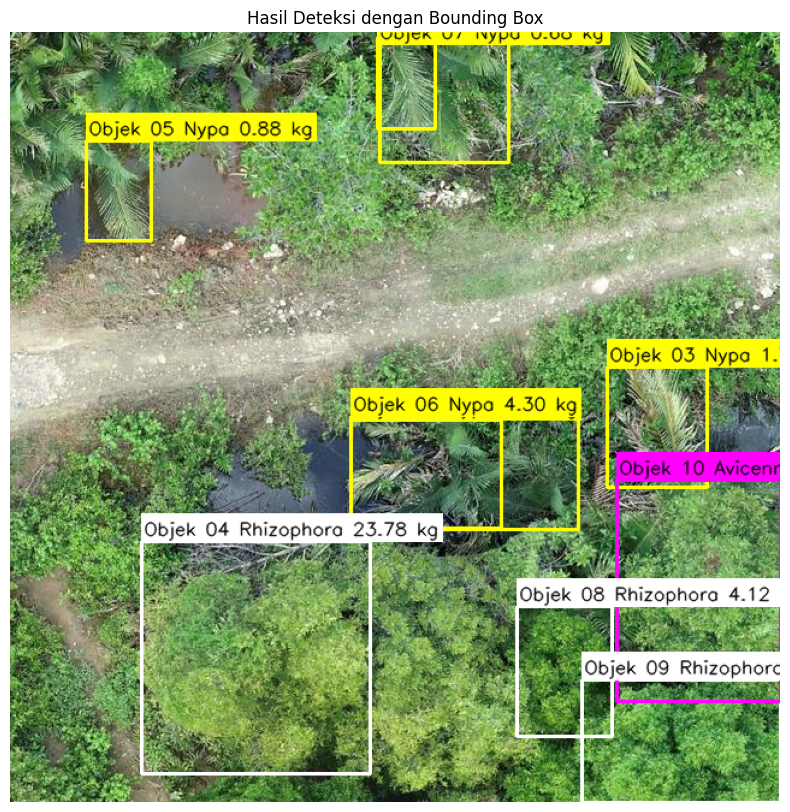

In [11]:
import numpy as np
from collections import defaultdict
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
from tabulate import tabulate

# Konstanta konversi
PIXEL_TO_METER_RATIO = 0.02734375  # m/px
CARBON_FRACTION = 0.47
CO2_CONVERSION = 3.67

# Parameter allometrik
ALLOMETRIC_PARAMS = {
    "Rhizophora": {"a": 0.251, "b": 1.21},
    "Avicennia": {"a": 0.184, "b": 1.29},
    "Nypa": {"a": 0.126, "b": 1.15}
}

# Warna box berdasarkan genus (BGR)
GENUS_COLORS = {
    "Rhizophora": (255, 255, 255),   # Putih
    "Avicennia": (255, 0, 255),      # Magenta
    "Nypa": (0, 255, 255),           # Kuning cerah (fix)
    "Unknown": (100, 100, 100)       # Abu-abu
}

def calculate_area_from_box(x, y, w, h):
    pixel_area = w * h
    meter_area = pixel_area * (PIXEL_TO_METER_RATIO ** 2)
    return meter_area, pixel_area

def estimate_carbon(area_m2, genus):
    if genus not in ALLOMETRIC_PARAMS:
        return 0, 0, 0
    a = ALLOMETRIC_PARAMS[genus]["a"]
    b = ALLOMETRIC_PARAMS[genus]["b"]
    B = a * (area_m2 ** b)
    C = B * CARBON_FRACTION
    C_abs = C * CO2_CONVERSION
    return B, C, C_abs

def process_detections(boxes, classes, confidences, model):
    class_data = defaultdict(lambda: {
        "count": 0,
        "areas": [],
        "biomass": 0,
        "carbon": 0,
        "co2": 0,
        "confidences": [],
        "details": []
    })

    object_texts = []

    for idx, (box, cls, conf) in enumerate(zip(boxes, classes, confidences), start=1):
        x, y, w, h = box
        area_m2, area_px = calculate_area_from_box(x, y, w, h)
        class_label = model.names.get(int(cls), "Unknown")

        class_label_lower = class_label.lower()
        genus = "Unknown"
        if "rhizophora" in class_label_lower:
            genus = "Rhizophora"
        elif "avicennia" in class_label_lower:
            genus = "Avicennia"
        elif "nypa" in class_label_lower:
            genus = "Nypa"

        B, C, C_abs = estimate_carbon(area_m2, genus)

        data = class_data[class_label]
        data["count"] += 1
        data["areas"].append(area_m2)
        data["biomass"] += B
        data["carbon"] += C
        data["co2"] += C_abs
        data["confidences"].append(conf)
        data["details"].append({
            "box_index": idx,
            "area_m2": area_m2,
            "area_px": area_px,
            "biomass": B,
            "carbon": C,
            "co2": C_abs,
            "confidence": conf,
            "xywh": (x, y, w, h),
            "genus": genus
        })

        # Label CO₂ di gambar
        text_y = int(max(5, y - h / 2 - 5))
        text_x = int(x - w / 2)
        object_texts.append({
            "label": f"Objek {idx:02d} {genus} {C_abs:.2f} kg",
            "xy": (text_x, text_y),
            "genus": genus
        })

    return class_data, object_texts

# Load model dan gambar
model = YOLO("/content/runs/detect/train/weights/best.pt")
image_path = '/content/drive/MyDrive/dataset/valid/images/id_500_png.rf.896d679ae2b1c94bd5eb36470516ada3.jpg'

# Prediksi
results = model.predict(source=image_path, conf=0.25, stream=True)
result = list(results)[0]
boxes = result.boxes

if boxes is None or len(boxes) == 0:
    print("Tidak ada objek terdeteksi.")
else:
    box_data = [box.xywh[0].tolist() for box in boxes]
    classes = boxes.cls.tolist()
    confidences = boxes.conf.tolist()

    stats, object_texts = process_detections(box_data, classes, confidences, model)

    # Tabel hasil
    print(f"\n{'='*30} HASIL DETEKSI {'='*30}")
    for class_label, data in stats.items():
        print(f"\nKelas: {class_label}")
        print(f"Jumlah objek: {data['count']}")
        print(f"Total biomassa: {data['biomass']:.2f} kg")
        print(f"Total karbon: {data['carbon']:.2f} kg")
        print(f"Total CO₂ setara: {data['co2']:.2f} kg")
        print(f"Rata-rata confidence: {np.mean(data['confidences']):.2f}\n")

        table_data = []
        for detail in data["details"]:
            table_data.append([
                detail["box_index"],
                f"{detail['area_m2']:.2f}",
                f"{int(detail['area_px'])}",
                f"{detail['biomass']:.2f}",
                f"{detail['carbon']:.2f}",
                f"{detail['co2']:.2f}",
                f"{detail['confidence']:.2f}"
            ])
        headers = ["Objek", "Luas (m²)", "Luas (px²)", "Biomassa (kg)", "Karbon (kg)", "CO₂ (kg)", "Confidence"]
        print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Visualisasi hasil
    img = result.orig_img.copy()

    for box, cls in zip(result.boxes.xyxy, result.boxes.cls):
        x1, y1, x2, y2 = map(int, box.tolist())
        class_label = model.names.get(int(cls), "Unknown").lower()

        if "rhizophora" in class_label:
            genus = "Rhizophora"
        elif "avicennia" in class_label:
            genus = "Avicennia"
        elif "nypa" in class_label:
            genus = "Nypa"
        else:
            genus = "Unknown"

        color = GENUS_COLORS.get(genus, (100, 100, 100))
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    # Tambahkan label teks CO₂
    for obj in object_texts:
        text = obj["label"]
        x, y = obj["xy"]
        genus = obj["genus"]
        color = GENUS_COLORS.get(genus, (100, 100, 100))

        font_scale = 0.5
        thickness = 1
        font = cv2.FONT_HERSHEY_SIMPLEX

        (tw, th), bl = cv2.getTextSize(text, font, font_scale, thickness)
        cv2.rectangle(img, (x, y - th - 6), (x + tw + 4, y + bl), color, -1)
        cv2.putText(img, text, (x + 2, y), font, font_scale, (0, 0, 0), thickness, cv2.LINE_AA)

    # Tampilkan dan simpan
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Hasil Deteksi dengan Bounding Box")
    plt.show()

    cv2.imwrite("/content/hasil_deteksi_final_fix.png", img)
